In [85]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [75]:
#IMPORT the data, available to download in kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
data = pd.read_csv("creditcard.csv")

In [76]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [77]:
data.shape

(284807, 31)

In [79]:
#checking for missing values
data.isnull().sum().sum()

0

In [80]:
#checkig the target variable
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

NOTE: The two classes are imbalanced!

## Exploratory Data Analysis - EDA

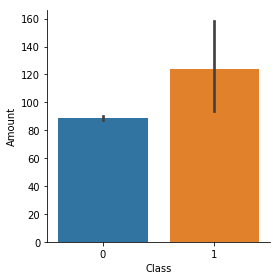

In [81]:
sns.factorplot(x="Class", y="Amount", data=train, kind="bar")

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,142228.0,88.663702,256.827819,0.0,5.53,21.990,76.8025,19656.53
1,246.0,123.723862,246.142067,0.0,1.00,10.145,129.9075,2125.87


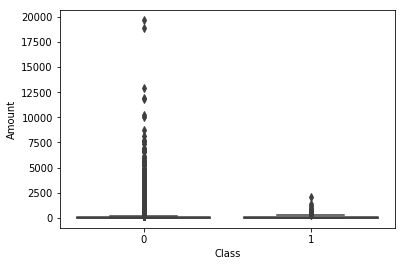

In [82]:
sns.boxplot(x="Class", y="Amount", data=train)
train.groupby('Class').Amount.describe()

In [42]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Data preperation

In [83]:
#alloting predictor and target variables
X = data.loc[:,['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = data.Class

In [86]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [87]:
#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=44)

## Data Resampling using SMOTE

Since we have a highly unbalanced dataset, We will oversample our minority class with SMOTE(Synthetic Minority Over-sampling Technique), which generates new samples.

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=44,kind='regular')
X_res, y_res = sm.fit_sample(X_train, y_train)
pd.value_counts(y_res)

1    199018
0    199018
dtype: int64

## Predict and Evaluate using Resampled set

In [89]:
from sklearn.linear_model import LogisticRegression
lrf = LogisticRegression()
lrf.fit(X_res,y_res)
y_pred2=lrf.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.9882260688412158
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85297
          1       0.11      0.84      0.20       146

avg / total       1.00      0.99      0.99     85443



In [90]:
pd.crosstab(y_test,y_pred2)

col_0,0,1
Class,,
0,84315,982
1,24,122


We have a good accuracy score and confusion matrix. Trying other algrithms

## Random Forest - Resampled set

We will now train the well-known random forest algorithm on the resampled train set. Random forest usually have satisfying performance on classification problem, even without complicated model tuning. 

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_res,y_res)
y_pred3=rf.predict(X_test)
print(accuracy_score(y_test,y_pred3))
classification_report(y_test,y_pred3)

0.9993679997191109


'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00     85297\n          1       0.82      0.81      0.81       146\n\navg / total       1.00      1.00      1.00     85443\n'

In [92]:
pd.crosstab(y_test,y_pred3)

col_0,0,1
Class,,
0,85271,26
1,28,118


Comparing to logistic regression, random forest gives less appropriate result. So we will go for logistic regression model.

## Conclusion

We willl get a good calssification model using logistic regression which will help in credit fraud detection.